# Build Your First ARIMA Model

Now's you chance to get some practice. You'll now build your first ARIMA model using the Champagne Sales dataset, which is the same dataset you used to build your ETS model. Use the steps below to guide you. (HINT: Like the ETS tool, the ARIMA tool has an auto setting under the model customization tab. You can check your manual model and what the auto setting would give you.)

Step 1 - Check stationarity: If a time series has a trend or seasonality component, it must be made stationary before we can use ARIMA to forecast. Use the TS Plot tool to see if the time series is stationary.

Step 2 - Difference: If the time series is not stationary, it needs to be stationarized through differencing. Take the first difference, then check for stationarity. Take as many differences as it takes. Make sure you check seasonal differencing as well.

Step 3 - Filter out a validation sample: This will be used to validate how accurate our model is. Use the last 6 periods as the validation sample.

Step 4 - Select AR and MA terms: Use the ACF and PACF to decide whether to include an AR term(s), MA term(s), or both.

Step 5 - Build the model: Build the model and set the number of periods to forecast to 6.

Step 6 - Validate model: Compare the predicted values to the actuals in the validation sample.


## Building Your First ARIMA Model
**Step 1** - Check stationarity: First thing to do is to visualize the data with a TimeSeries Plot. You can see some seasonality and perhaps some trend as well.

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose as sm
#from datetime import datetime


### Functions to be used for processing data

In [3]:
from statsmodels.tsa.stattools import adfuller

# Function to test the stationarity

def test_stationarity(ts, interval = 1):
  
    rolmean = ts.rolling(interval).mean()
    rolstd = ts.rolling(interval).std()

    plt.plot(ts, label='Original')
    plt.plot(rolmean, label = 'Rolling Mean')
    plt.plot(rolstd, label = 'Rolling Std Dev')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')

    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                             'Number of Observations Used'])
    param1 = dfoutput['Test Statistic']
    param2 = dfoutput['p-value']
    
    if param2 > 0.05:
        print('    The p_value is greater than 5%, series is NOT stationary')
    else:
        print('    The p_value is less than 5%, series is stationary')
              
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        if value < param1:
            print('    The Test Statistic is greater than {0} critical value, series is NOT stationary'.format(key))
        else:
            print('    The Test Statistic is smaller than {0} critical value, series is stationary'.format(key))
                
    
    return dfoutput

In [4]:
# Function for differencing

def difference(ts, window=1):
    a = ts.rolling(12).mean()
    b = ts - a
    b.dropna(inplace=True)
    return b

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_plot(ts):
    decomposition = seasonal_decompose(ts)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    residual.dropna(inplace=True)
    
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc = 'best')
    plt.subplot(412)
    plt.plot(trend, label = 'Trend')
    plt.legend(loc = 'best')
    plt.subplot(413)
    plt.plot(seasonal, label = 'Seasonality')
    plt.legend(loc = 'best')
    plt.subplot(414)
    plt.plot(residual, label = 'Residual')
    plt.legend(loc = 'best')
    plt.tight_layout()
    return residual

### End of section for - Functions to be used for processing data

In [5]:
# Open the csv file and display the first rows

#from tkinter.filedialog import askopenfilename
#filename = askopenfilename()

df = pd.read_csv('monthly-champagne-sales.csv')
df.head()


,Month,sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [6]:
# convert the data type of the month column to date 
df['Month']= pd.to_datetime(df['Month'])

# set the index to date
df.set_index('Month', inplace=True)

# display the data table info
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
sales    105 non-null int64
dtypes: int64(1)
memory usage: 1.6 KB


    The p_value is greater than 5%, series is NOT stationary
    The Test Statistic is greater than 1% critical value, series is NOT stationary
    The Test Statistic is greater than 5% critical value, series is NOT stationary
    The Test Statistic is greater than 10% critical value, series is NOT stationary


Test Statistic                 -1.833593
p-value                         0.363916
#Lags Used                     11.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64

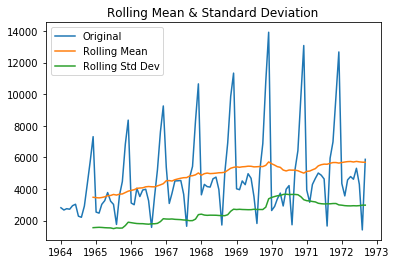

In [15]:
#Convert the dataframe to timeseries
ts = df['sales']

# Plot the data
test_stationarity(ts,12)


**Step 2** - Difference: If the time series is not stationary, it needs to be stationarized through differencing. Take the first difference, then check for stationarity. Take as many differences as it takes. Make sure you check seasonal differencing as well.

### Making the time series stationarity

The first step is to reduce the trend using transformation

In [49]:
ts_diff = ts.diff()

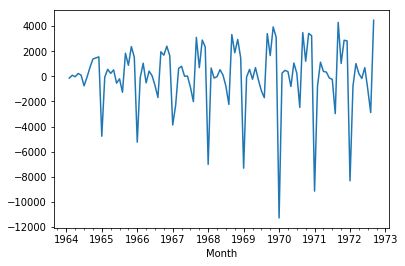

In [50]:
ts_diff.plot()

In [51]:
ts_diff.dropna(inplace=True)

    The p_value is less than 5%, series is stationary
    The Test Statistic is smaller than 1% critical value, series is stationary
    The Test Statistic is smaller than 5% critical value, series is stationary
    The Test Statistic is smaller than 10% critical value, series is stationary


Test Statistic                -7.189896e+00
p-value                        2.519620e-10
#Lags Used                     1.100000e+01
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64

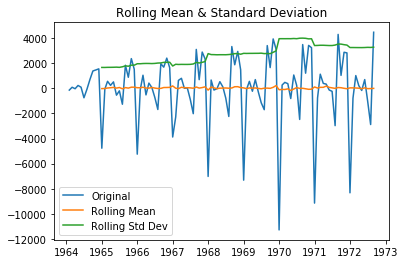

In [56]:
test_stationarity(ts_diff,12)

In [53]:
ts_log = np.log(ts)

In [61]:
ts_log_diff = ts_log.diff()
ts_log_diff.dropna(inplace=True)

    The p_value is less than 5%, series is stationary
    The Test Statistic is smaller than 1% critical value, series is stationary
    The Test Statistic is smaller than 5% critical value, series is stationary
    The Test Statistic is smaller than 10% critical value, series is stationary


Test Statistic                 -4.460914
p-value                         0.000231
#Lags Used                     12.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64

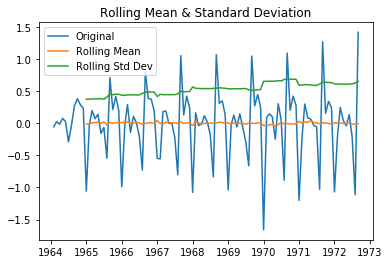

In [63]:
test_stationarity(ts_log_diff,12)

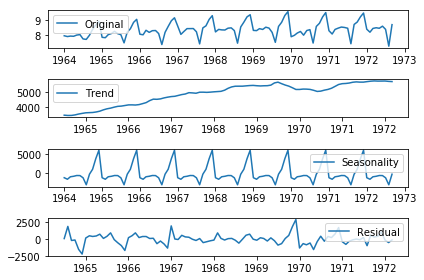

In [85]:
res = decompose_plot(ts)

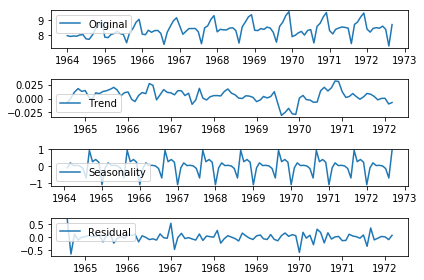

In [86]:
res_diff = decompose_plot(ts_log_diff)

    The p_value is less than 5%, series is stationary
    The Test Statistic is smaller than 1% critical value, series is stationary
    The Test Statistic is smaller than 5% critical value, series is stationary
    The Test Statistic is smaller than 10% critical value, series is stationary


Test Statistic                 -4.323381
p-value                         0.000405
#Lags Used                     11.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64

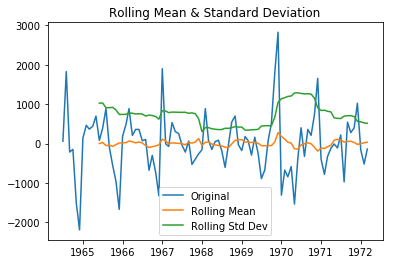

In [87]:
test_stationarity(res,12)

    The p_value is less than 5%, series is stationary
    The Test Statistic is smaller than 1% critical value, series is stationary
    The Test Statistic is smaller than 5% critical value, series is stationary
    The Test Statistic is smaller than 10% critical value, series is stationary


Test Statistic                -6.251533e+00
p-value                        4.441822e-08
#Lags Used                     1.100000e+01
Number of Observations Used    8.000000e+01
Critical Value (1%)           -3.514869e+00
Critical Value (5%)           -2.898409e+00
Critical Value (10%)          -2.586439e+00
dtype: float64

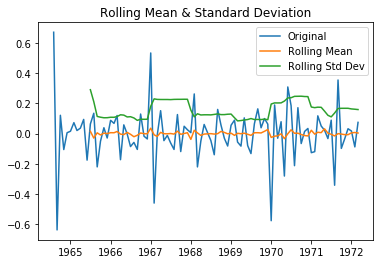

In [88]:
test_stationarity(res_diff,12)

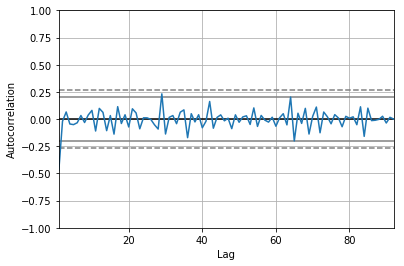

In [96]:
pd.plotting.autocorrelation_plot(res_diff)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import 

**Step 3** - Filter out a validation sample: This is done the same was it was done with the ETS model. Attach a Record ID and Filter tools to the Data Input tool and filter out the last 6 periods.

**Step 4** - Select AR and MA terms: Let's take a look at the ACF and PACF of the seasonally differenced dataset. There appears to be significant positive autocorrelation at periods 1 and 13. The positive autocorrelation points towards AR terms, so I'd suggest starting with one AR term for both the seasonal and non-seasonal parts of the ARIMA model for:

## ARIMA(1,0,0)(1,1,0)12
Remember, selecting these terms manually generally means choosing several models and comparing them against a validation sample. In our case, we'll just build out one manual model for practice, then use the auto settings to have the tool choose the best model for us.

**Step 5** - Build the model: Build the model using the ARIMA tool and set the number of periods to forecast to 6. Attach a browse tool to the I output node. After running the model, you can see the forecast of the last six periods. The forecast of the final period is 13,366.

**Step 6** - Validate model: Compare the predicted values to the actuals in the validation sample using the TS Compare tool. For the final period, the ARIMA model forecasted 13,366 vs the actual of 12,670.